# CNN Layer 파라미터

In [ ]:
import tensorflow as tf

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(train_x,train_y), (test_x,test_y) = datasets.mnist.load_data()

In [ ]:
image = train_x[0]
image.shape

(28, 28)

In [ ]:
image.shape

(28, 28)

In [ ]:
image = image[tf.newaxis, ...,tf.newaxis]
image.shape

(1, 28, 28, 1)

# Convolution
- filters : lyaer 에서 나갈 때 몇개의 fillter 를 만들 것인지
- kernel_size : filter(weight)의 사이즈
- strides: 몇개의 pixel을 skip하면서 지나갈 것 인지
- padding : zero padding 을 만들 것 인지 VALID(zero padding 없고), SAM(zero padding 있다) (사이즈에 영향을 줌)
- activation : Activation Function 을 만들 것인지, 나중에 Activation Function Layer 를 따로 만들 수 있음.




In [ ]:
# tf.keras.layers.Dense(1, activation='softmax')
tf.keras.layers.Conv2D(filters = 3, kernel_size=(3,3), strides=(1,1),padding='VALID', activation='relu')

In [ ]:
tf.keras.layers.Conv2D(filters = 3, kernel_size=(3), strides=(1,1),padding='VALID', activation='relu')

In [ ]:
image = tf.cast(image, dtype=tf.float32)

In [ ]:
#                             필터,커널
layer = tf.keras.layers.Conv2D(3,3, strides=(1,1), padding='SAME')
output = layer(image)

In [ ]:
weight = layer.get_weights()[0]
weight

array([[[[ 0.36540073,  0.08982575,  0.31883818]],

        [[-0.00168845,  0.22767091,  0.06728485]],

        [[-0.36454302, -0.23725635, -0.12356541]]],


       [[[ 0.0803673 ,  0.17533791,  0.27870798]],

        [[ 0.20643216, -0.05476466, -0.34843853]],

        [[ 0.00576031,  0.3332218 ,  0.25505185]]],


       [[[ 0.3781476 ,  0.38692182,  0.23457605]],

        [[-0.30057493, -0.38501176,  0.37586725]],

        [[ 0.30361545, -0.3341312 ,  0.12643403]]]], dtype=float32)

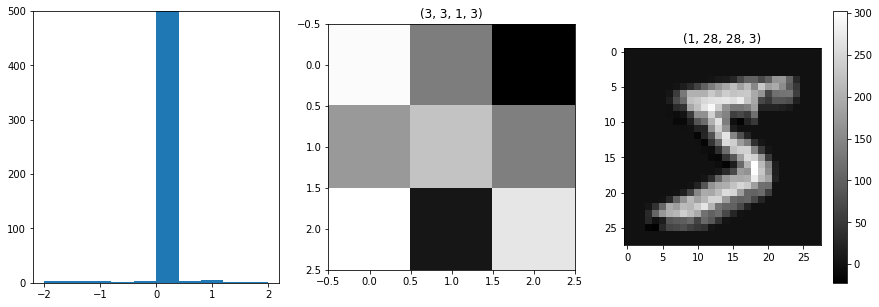

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=(-2,2))
plt.ylim(0,500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,2],'gray')
plt.colorbar()
plt.show()

In [ ]:
layer = tf.keras.layers.ReLU()
output = layer(output)

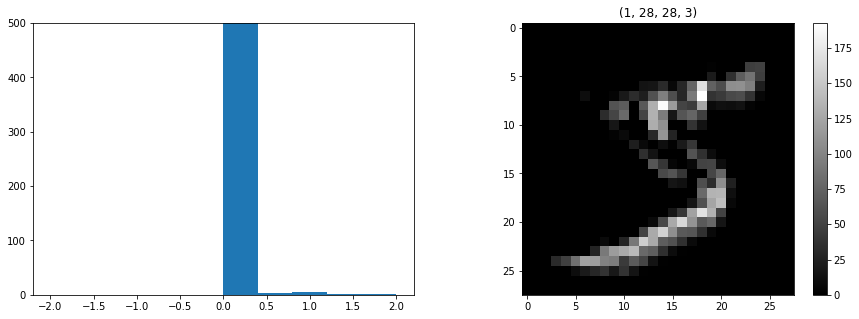

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(output.numpy().ravel(),range=(-2,2))
plt.ylim(0,500)
plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0,:,:,1],'gray')
plt.colorbar()
plt.show()

In [ ]:
# Pooling(Avg(평균값계산), Max(최대값1개남기고 삭제))
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')

In [ ]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 7, 7, 3])

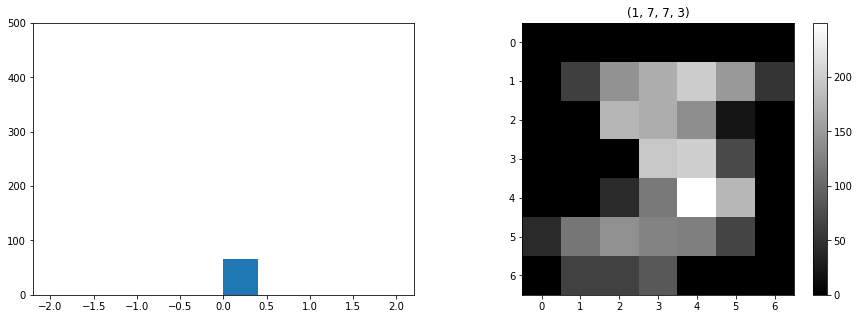

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(output.numpy().ravel(),range=(-2,2))
plt.ylim(0,500)
plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [ ]:
# Fully COnected
# Flatten
tf.keras.layers.Flatten()

In [ ]:
layer = tf.keras.layers.Flatten()
output = layer(output)
output.shape

TensorShape([1, 147])

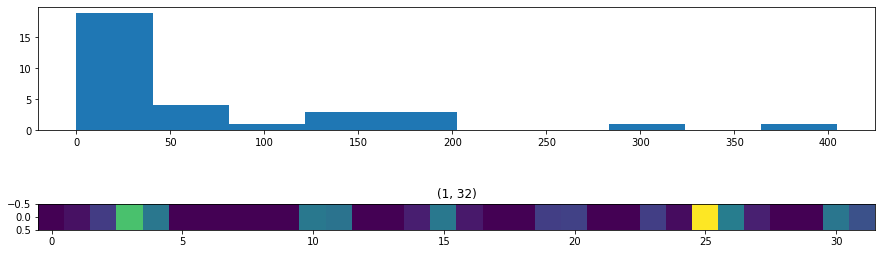

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.title(output.shape)
plt.imshow(output[:,:100])
plt.show()

In [ ]:
output[0][56]

<tf.Tensor: shape=(), dtype=float32, numpy=179.44684>

In [ ]:
# Dense
tf.keras.layers.Dense(32, activation='relu')

In [ ]:
layer = tf.keras.layers.Dense(32, activation='relu')
output = layer(output)

In [ ]:
output.get_shape,layer.get_weights()

(<bound method _EagerTensorBase.get_shape of <tf.Tensor: shape=(1, 32), dtype=float32, numpy=
 array([[  0.      ,  18.323961,  72.345245, 289.12256 , 159.80269 ,
           0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         161.93048 , 153.63751 ,   0.      ,   0.      ,  33.774567,
         162.64522 ,  27.130066,   0.      ,   0.      ,  75.03383 ,
          78.443695,   0.      ,   0.      ,  75.355865,  13.686203,
         404.8174  , 171.50336 ,  35.59677 ,   0.      ,   0.      ,
         158.35345 , 100.7492  ]], dtype=float32)>>,
 [array([[-0.04999244,  0.04491191, -0.00742586, ...,  0.06191431,
           0.13093342,  0.09754379],
         [ 0.00199744,  0.11470897, -0.17218694, ...,  0.00163972,
          -0.06339323,  0.03580131],
         [ 0.00363404,  0.05726719, -0.03875278, ..., -0.02261418,
           0.06372374, -0.1326584 ],
         ...,
         [ 0.11499675, -0.14725265,  0.04385766, ...,  0.12949358,
           0.12211902,  0.12943302],
         

In [ ]:
# Drop Out(과적합을 방지하는 방법 중 하나)
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

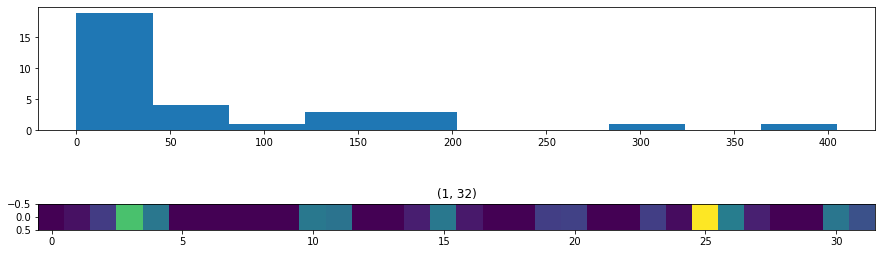

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.title(output.shape)
plt.imshow(output[:,:100])
plt.show()

# Build Model

In [ ]:
from tensorflow.keras import layers


In [ ]:
input_shape = (28,28,1)
num_classes = 10

In [ ]:
inputs = layers.Input(input_shape)## Convolutions
net = layers.Conv2D(32,(3,3),padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,(3,3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,(3,3),padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,(3,3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

In [ ]:
model = tf.keras.Model(inputs=inputs,outputs=net, name='Basic_CNN')

In [ ]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                         